In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:\\Users\\gabde\\Downloads\\synthetic_db.csv")
df = df[["segment", "magnitude", "engine_cost", "sum", "image_path"]]
df

,segment,magnitude,engine_cost,sum,image_path
0,1,1,27683.571008,41774.757899,C:\Users\gabde\Downloads\augmented_images\1_1_...
1,1,2,53645.343563,73990.154964,C:\Users\gabde\Downloads\augmented_images\1_1_...
2,1,3,65036.314025,116019.808937,C:\Users\gabde\Downloads\augmented_images\1_1_...
3,1,1,70791.487975,115559.326379,C:\Users\gabde\Downloads\augmented_images\1_1_...
4,1,2,51001.016010,100949.117128,C:\Users\gabde\Downloads\augmented_images\1_1_...
...,...,...,...,...,...
235,3,2,101223.612768,155684.668243,C:\Users\gabde\Downloads\augmented_images\3_2_...
236,3,3,146514.153905,247550.276153,C:\Users\gabde\Downloads\augmented_images\3_2_...
237,3,1,101154.015473,127234.502360,C:\Users\gabde\Downloads\augmented_images\3_2_...
238,3,2,121727.398068,224795.744136,C:\Users\gabde\Downloads\augmented_images\3_2_...


In [11]:
data = pd.get_dummies(df, columns=['segment', 'magnitude'], drop_first=True) # one hot encoding

In [12]:
data

,engine_cost,sum,image_path,segment_2,segment_3,magnitude_2,magnitude_3
0,27683.571008,41774.757899,C:\Users\gabde\Downloads\augmented_images\1_1_...,False,False,False,False
1,53645.343563,73990.154964,C:\Users\gabde\Downloads\augmented_images\1_1_...,False,False,True,False
2,65036.314025,116019.808937,C:\Users\gabde\Downloads\augmented_images\1_1_...,False,False,False,True
3,70791.487975,115559.326379,C:\Users\gabde\Downloads\augmented_images\1_1_...,False,False,False,False
4,51001.016010,100949.117128,C:\Users\gabde\Downloads\augmented_images\1_1_...,False,False,True,False
...,...,...,...,...,...,...,...
235,101223.612768,155684.668243,C:\Users\gabde\Downloads\augmented_images\3_2_...,False,True,True,False
236,146514.153905,247550.276153,C:\Users\gabde\Downloads\augmented_images\3_2_...,False,True,False,True
237,101154.015473,127234.502360,C:\Users\gabde\Downloads\augmented_images\3_2_...,False,True,False,False
238,121727.398068,224795.744136,C:\Users\gabde\Downloads\augmented_images\3_2_...,False,True,True,False


In [9]:
binary_cols = ['segment_2', 'segment_3', 'magnitude_2', 'magnitude_3']
data[binary_cols] = data[binary_cols].astype(int)

In [10]:
# адаптивная модель для изображений
def create_model(input_shape=(224, 224, 3)):
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(128, activation='relu')(x)
    
    return Model(inputs=base_model.input, outputs=outputs)

In [13]:
feature_extractor = create_model()

# извлечение и объединение фич изображений с основным датасетом
image_features = []
for img_path in data['image_path']:
    features = extract_features(img_path)
    image_features.append(features)

image_df = pd.DataFrame(image_features, columns=[f'img_{i}' for i in range(1280)])

combined_data = pd.concat([data, image_df], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━

In [41]:
binary_cols = ['segment_2', 'segment_3', 'magnitude_2', 'magnitude_3']
data[binary_cols] = data[binary_cols].astype(int)
data = combined_data.drop(columns=['image_path'])
data

,engine_cost,sum,segment_2,segment_3,magnitude_2,magnitude_3,img_0,img_1,img_2,img_3,...,img_1270,img_1271,img_1272,img_1273,img_1274,img_1275,img_1276,img_1277,img_1278,img_1279
0,27683.571008,41774.757899,0,0,0,0,1.457210,-0.010528,-0.120342,-0.075161,...,-0.087113,-0.192765,0.232682,-0.082075,0.742461,-0.125541,0.217273,-0.134385,0.076150,-0.175519
1,53645.343563,73990.154964,0,0,1,0,1.504039,-0.002020,-0.093856,-0.068829,...,-0.111953,-0.185883,0.172561,-0.083321,0.525059,-0.126800,0.305334,-0.126843,-0.007114,-0.123884
2,65036.314025,116019.808937,0,0,0,1,1.382957,-0.000893,-0.107910,-0.123307,...,-0.117564,-0.185570,0.019607,-0.070139,0.436461,-0.175922,0.170862,-0.114684,-0.082375,-0.222552
3,70791.487975,115559.326379,0,0,0,0,1.641153,-0.060482,-0.089059,-0.113453,...,-0.133688,-0.178710,-0.109047,-0.080801,0.372980,-0.130025,0.483970,-0.098264,-0.143675,-0.163208
4,51001.016010,100949.117128,0,0,1,0,1.723532,0.038753,-0.102404,-0.078450,...,-0.108928,-0.203329,-0.001734,-0.082094,0.404251,-0.125115,0.343289,-0.108133,-0.085994,-0.184264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,101223.612768,155684.668243,0,1,1,0,1.457777,-0.067211,-0.089415,0.008412,...,-0.104064,-0.049776,-0.109723,-0.105856,0.457537,-0.099621,-0.073289,-0.158752,-0.048468,-0.194803
236,146514.153905,247550.276153,0,1,0,1,1.143251,-0.056147,-0.090172,-0.026269,...,-0.146484,0.086881,-0.081584,-0.109962,0.435411,-0.100542,-0.015672,-0.106730,-0.053613,-0.169532
237,101154.015473,127234.502360,0,1,0,0,1.136972,-0.033098,-0.088687,-0.056229,...,-0.120138,0.030382,-0.078280,-0.096610,0.532683,-0.095057,0.127316,-0.144994,-0.104478,-0.183542
238,121727.398068,224795.744136,0,1,1,0,1.118582,-0.066623,-0.106742,-0.064149,...,-0.121148,-0.001506,-0.095889,-0.114083,0.539869,-0.091832,0.146469,-0.150295,-0.067309,-0.198822


C:\Users\gabde\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\gabde\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


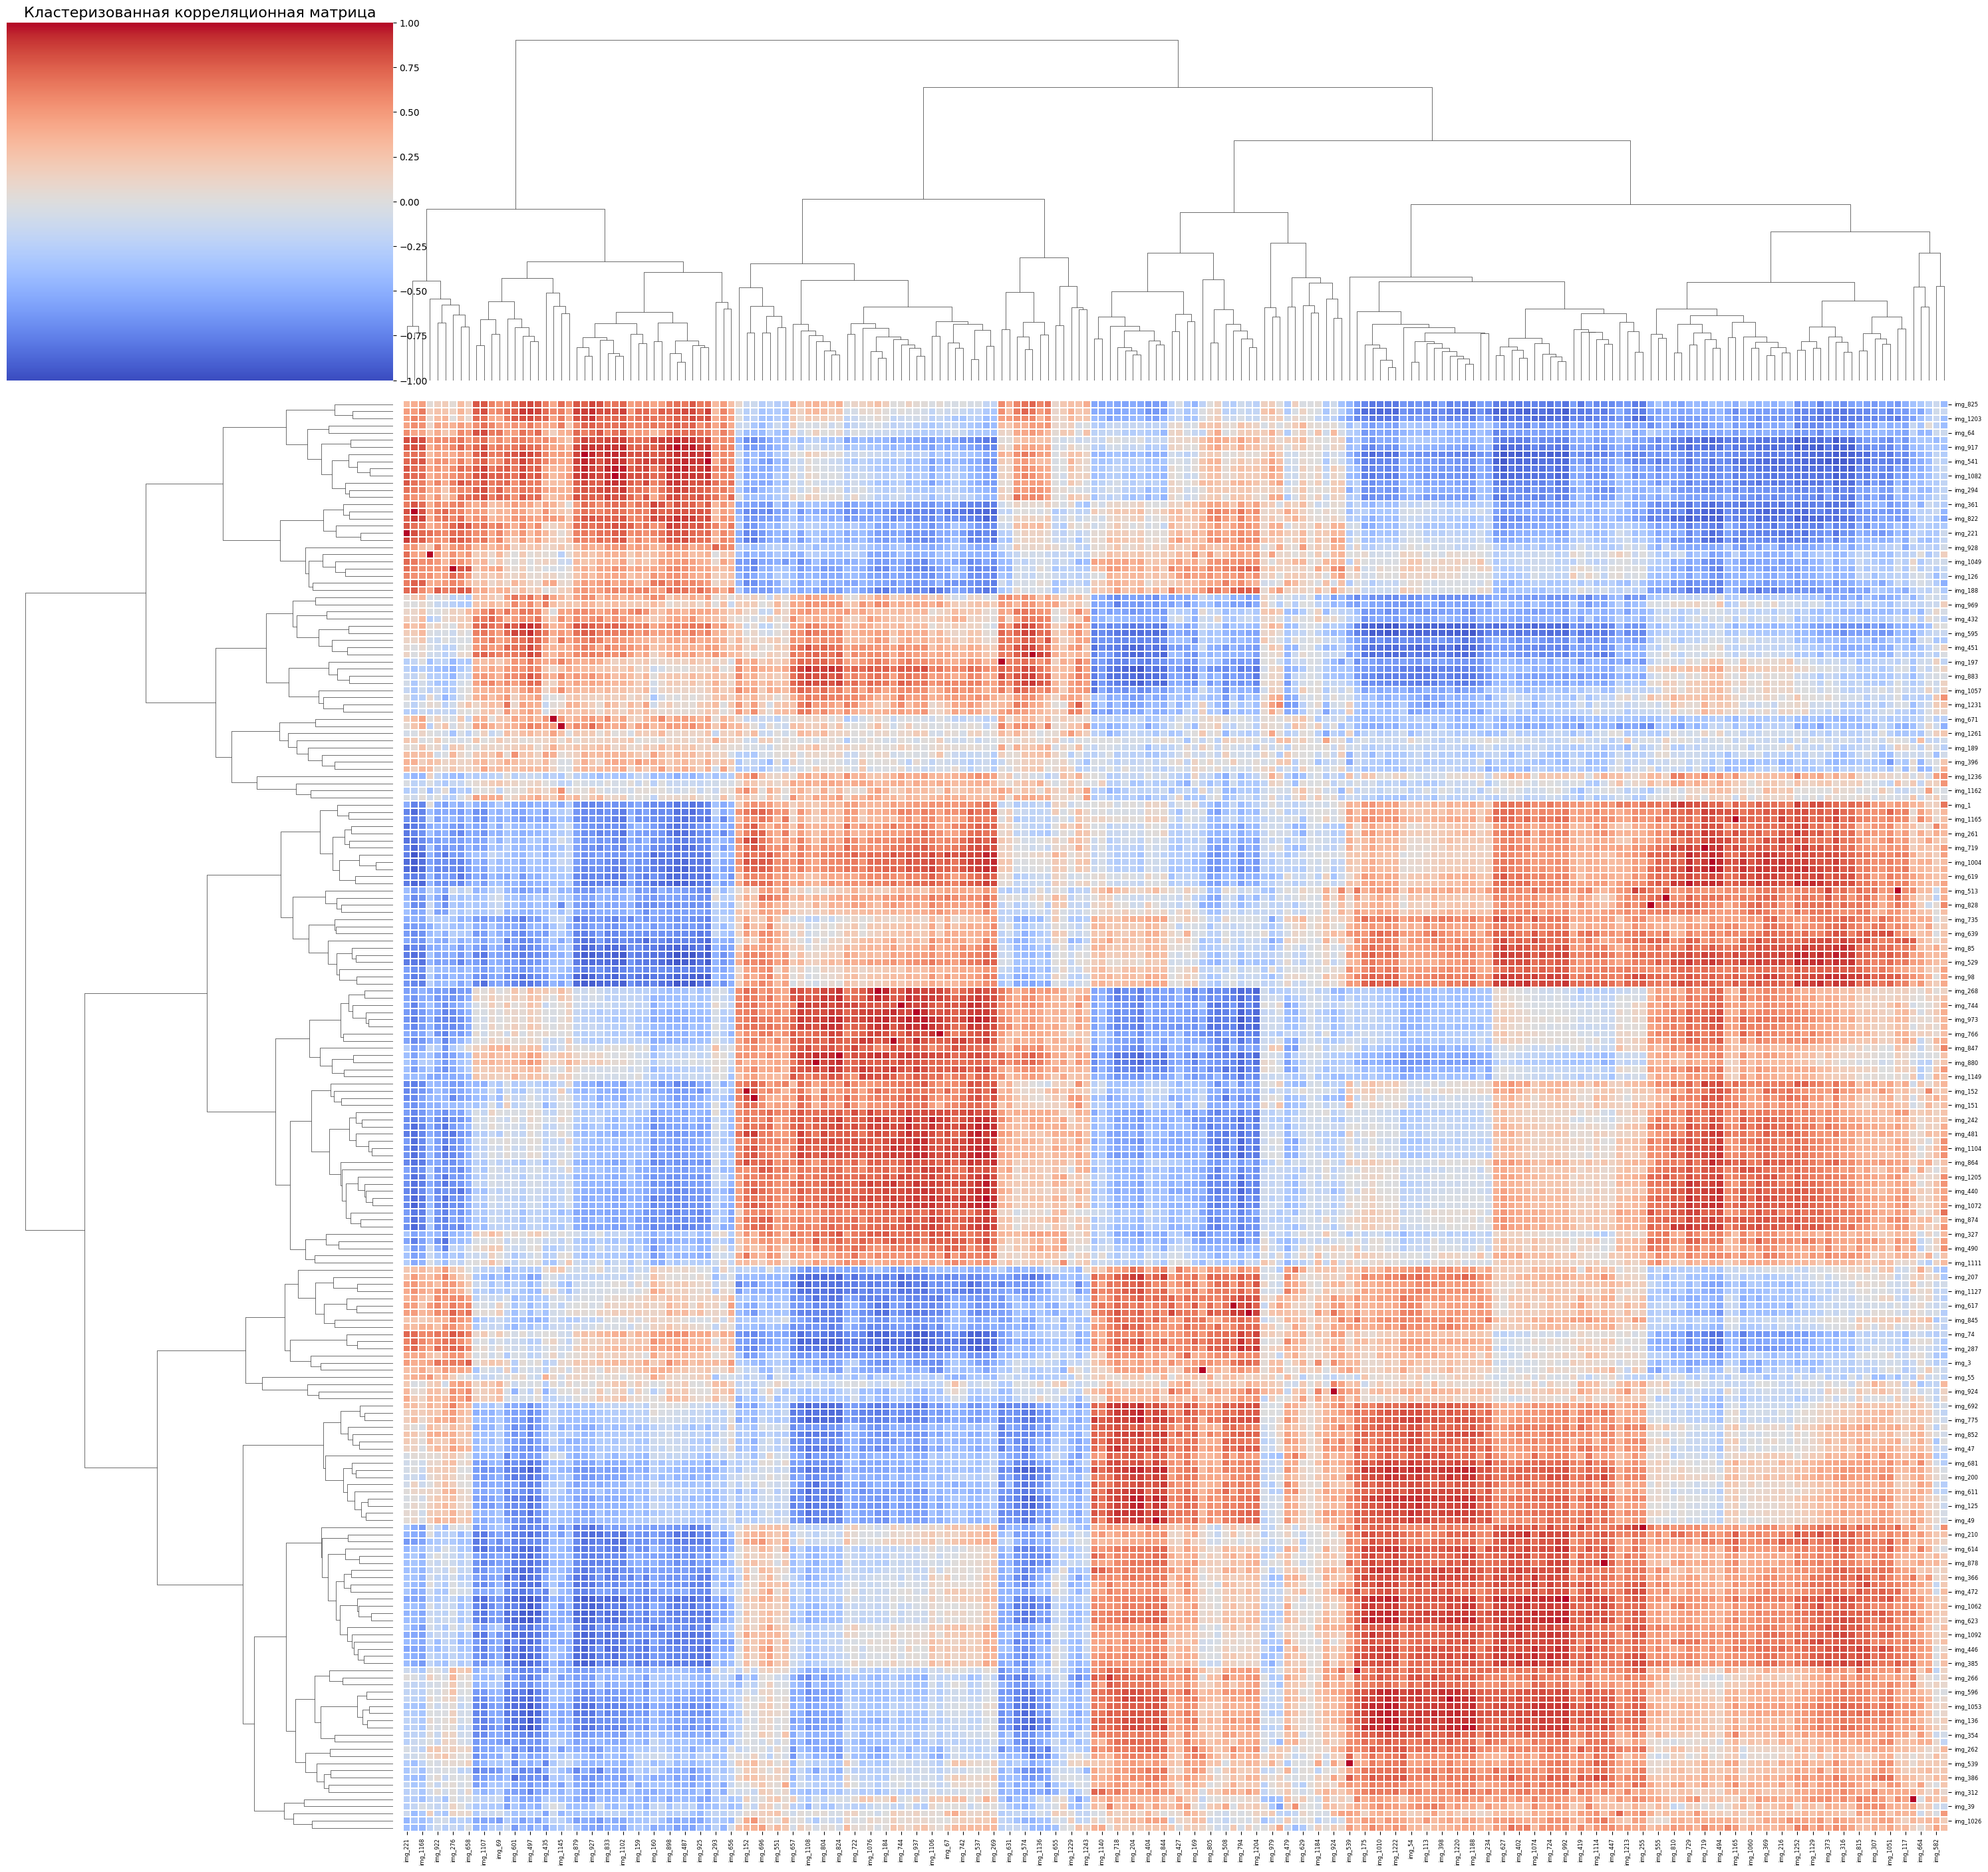

In [25]:
# корреляция
numeric_data = data.select_dtypes(include=['int64', 'float64', 'float32'])
corr_matrix = numeric_data.corr()
g = sns.clustermap(
    corr_matrix.sample(n=200, axis=0).sample(n=200, axis=1),  # Берем подвыборку
    figsize=(30, 28),
    cmap='coolwarm',
    vmin=-1, vmax=1,
    row_cluster=True,
    col_cluster=True,
    linewidths=0.1
)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=6)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=6)
plt.title("Кластеризованная корреляционная матрица", fontsize=16)
plt.tight_layout()
plt.show()

In [29]:
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.95:
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

pairs = len(high_corr_pairs)
print(f"Найдено {pairs} высококоррелированных пар")
for pair in high_corr_pairs[:pairs]:  # Первые 10 пар
    print(f"{pair[0]} и {pair[1]}: {pair[2]:.2f}")

Найдено 446 высококоррелированных пар
engine_cost и sum: 0.96
img_7 и img_550: 0.97
img_7 и img_1071: 0.96
img_8 и img_114: 0.95
img_8 и img_602: 0.95
img_8 и img_917: 0.95
img_8 и img_966: 0.96
img_8 и img_1075: -0.95
img_14 и img_834: 0.96
img_14 и img_1239: 0.95
img_32 и img_535: 0.95
img_32 и img_932: 0.96
img_32 и img_1222: 0.95
img_38 и img_1102: 0.97
img_52 и img_57: 0.95
img_52 и img_109: 0.96
img_52 и img_247: 0.96
img_52 и img_481: 0.95
img_52 и img_482: 0.96
img_52 и img_537: 0.95
img_52 и img_733: 0.95
img_52 и img_750: 0.96
img_52 и img_1130: 0.95
img_56 и img_723: 0.95
img_57 и img_227: 0.95
img_57 и img_750: 0.95
img_58 и img_295: 0.96
img_58 и img_315: 0.96
img_58 и img_460: 0.95
img_58 и img_579: 0.96
img_58 и img_954: 0.96
img_58 и img_1072: 0.96
img_58 и img_1104: 0.96
img_79 и img_284: 0.95
img_79 и img_295: 0.98
img_79 и img_579: 0.98
img_79 и img_592: 0.97
img_79 и img_840: 0.95
img_79 и img_1269: 0.96
img_81 и img_519: -0.95
img_84 и img_956: 0.96
img_105 и img_2

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
img_cols = [col for col in data.columns if col.startswith('img_')]
img_data = data[img_cols]
X = data[['engine_cost', 'segment_2', 'segment_3', 'magnitude_2', 'magnitude_3'] + img_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data) # снижение мультиколлинеарности у engine_cost с использованием фич изображений

C:\Users\gabde\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          feature       VIF
0     engine_cost  6.560559
1       segment_2  1.321054
2       segment_3  4.589916
3     magnitude_2  1.850734
4     magnitude_3  3.675874
...           ...       ...
1280     img_1275       inf
1281     img_1276       inf
1282     img_1277       inf
1283     img_1278       inf
1284     img_1279       inf

[1285 rows x 2 columns]


In [43]:
X = data[['engine_cost', 'segment_2', 'segment_3', 'magnitude_2', 'magnitude_3'] + img_cols]
y = data['sum']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=10.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [45]:
results = {}
for name, model in models.items():
    # Обучение
    model.fit(X_train, y_train)
    
    # Предсказание
    y_pred = model.predict(X_test)
    
    # Метрики
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [46]:
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R²: {metrics['R²']:.4f}")

# Выбор лучшей модели по RMSE
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
print(f"\nBest model: {best_model_name}")


Linear Regression:
  MAE: 12937.67
  RMSE: 16930.93
  R²: 0.8450

Ridge:
  MAE: 12031.41
  RMSE: 15452.72
  R²: 0.8709

Random Forest:
  MAE: 13408.54
  RMSE: 17918.99
  R²: 0.8264

Gradient Boosting:
  MAE: 13073.30
  RMSE: 17331.48
  R²: 0.8376

Best model: Ridge
